# week 4 assignment 2nd data set: id:23-23--23-0

# (a)logistic classifier

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve

In [20]:
df = pd.read_csv('week4(2).txt')
print(df.head())
# data for visulization
neg = df[df.y==-1]
pos = df[df.y==1]
x1_neg = neg.iloc[:,0]
x2_neg = neg.iloc[:,1]
x1_pos = pos.iloc[:,0]
x2_pos = pos.iloc[:,1]
# data for training and testing
x1 = df.iloc[:,0]
x2 = df.iloc[:,1]
X=np.column_stack((x1,x2))
y = df.iloc[:,2]

     x1    x2  y
0 -0.27  0.40  1
1  0.63 -0.91  1
2 -0.52  0.53  1
3 -0.33  0.03  1
4 -0.05 -0.10  1


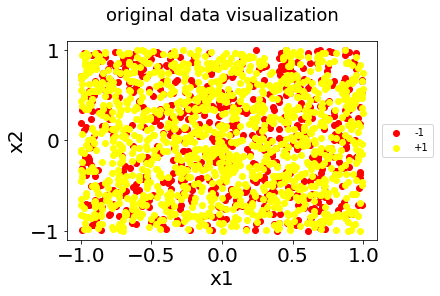

In [21]:
plt.rc('font', size=20)
plt.rcParams['figure.constrained_layout.use'] = True
plt.title("original data visualization",fontsize=18,pad=20)
plt.scatter(x1_neg, x2_neg, color='red')
plt.scatter(x1_pos, x2_pos, color='yellow')
plt.xlabel('x1'); plt.ylabel('x2')
plt.legend(['-1','+1'],loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 10})
plt.savefig('original-data.png', facecolor='w', transparent=False)
plt.show()

In [23]:
#train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,stratify=y)

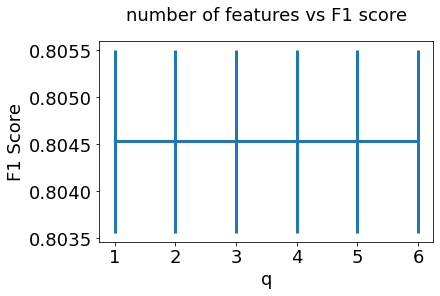

In [24]:
#cross-validation to select the maximum order of polynomial to use 
mean_error=[]
std_error=[]
q_range = [1,2,3,4,5,6]
Xtrain = np.array(Xtrain)

for q in q_range:
    poly_features = PolynomialFeatures(q)
    poly_X_train = poly_features.fit_transform(Xtrain)
    model = LogisticRegression(penalty='l2');

    scores = cross_val_score(model,poly_X_train, ytrain, cv=5, scoring='f1')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.errorbar(q_range,mean_error,yerr=std_error,linewidth=3)
plt.title("number of features vs F1 score",fontsize=18,pad=20)
plt.xlabel('q'); plt.ylabel('F1 Score')
plt.savefig('tuningQ.png', facecolor='w', transparent=False)
plt.show()

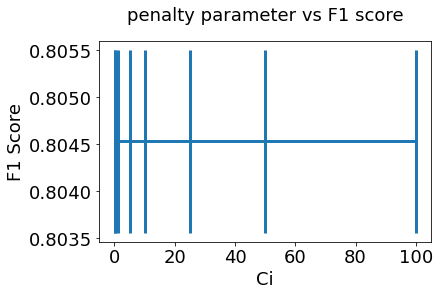

In [25]:
#cross-validation to select the weight C given to the penalty in the cost function.
mean_error=[]
std_error=[]
Ci_range = [0.01, 0.1, 1, 5, 10, 25, 50, 100]

for Ci in Ci_range:

    model = LogisticRegression(penalty='l2',C=Ci);

    scores = cross_val_score(model,Xtrain, ytrain, cv=5, scoring='f1')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.errorbar(Ci_range,mean_error,yerr=std_error,linewidth=3)
plt.title("penalty parameter vs F1 score",fontsize=18,pad=20)
plt.xlabel('Ci'); plt.ylabel('F1 Score')
plt.savefig('tuningC.png', facecolor='w', transparent=False)
plt.show()

In [26]:
#training with logistic classifier
Xtrain = np.array(Xtrain)
poly_features = PolynomialFeatures(6)
poly_X_train = poly_features.fit_transform(Xtrain)
lr = LogisticRegression(penalty='l2',C=1,solver='lbfgs')
lr.fit(poly_X_train,ytrain)


LogisticRegression(C=1)

In [27]:
#predict

Xtest = np.array(Xtest)
poly_features = PolynomialFeatures(6)
poly_X_test = poly_features.fit_transform(Xtest)
y_pred = lr.predict(poly_X_test)
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))
predict=np.column_stack([Xtest, y_pred])
df = pd.DataFrame(predict, columns = ['x1','x2','y'])
neg_pred = df[df.y==-1]
pos_pred = df[df.y==1]
x1_pred_neg = neg_pred.iloc[:,0]
x2_pred_neg = neg_pred.iloc[:,1]
x1_pred_pos = pos_pred.iloc[:,0]
x2_pred_pos = pos_pred.iloc[:,1]

[[  0 121]
 [  0 249]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       121
           1       0.67      1.00      0.80       249

    accuracy                           0.67       370
   macro avg       0.34      0.50      0.40       370
weighted avg       0.45      0.67      0.54       370



C:\Users\tomzt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


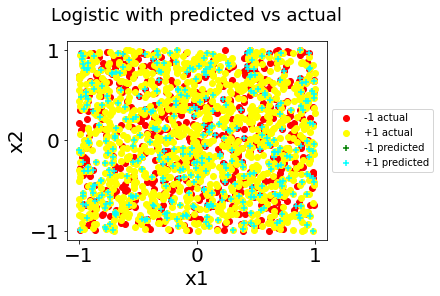

In [28]:
plt.rc('font', size=20)
plt.rcParams['figure.constrained_layout.use'] = True
plt.title("Logistic with predicted vs actual",fontsize=18,pad=20)
plt.scatter(x1_neg, x2_neg, color='red')
plt.scatter(x1_pos, x2_pos, color='yellow')
plt.scatter(x1_pred_neg, x2_pred_neg, color='green',marker='+')
plt.scatter(x1_pred_pos, x2_pred_pos, color='cyan',marker='+')

plt.xlabel('x1'); plt.ylabel('x2')
plt.legend(['-1 actual','+1 actual','-1 predicted','+1 predicted'],loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 10  })
plt.savefig('logistic1.png', facecolor='w', transparent=False)                                                                                                                
plt.show()

# (b) KNN

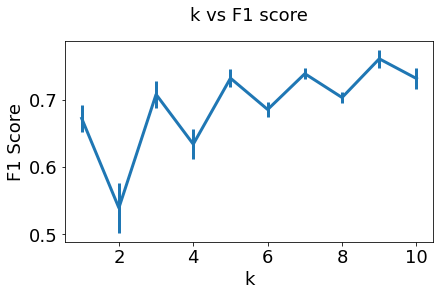

In [29]:
#cross-validation to select k
mean_error=[]
std_error=[]
k_range = [1,2,3,4,5,6,7,8,9,10]

for k in k_range:

    model = KNeighborsClassifier(n_neighbors=k,weights='uniform');

    scores = cross_val_score(model,Xtrain, ytrain, cv=5, scoring='f1')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.errorbar(k_range,mean_error,yerr=std_error,linewidth=3)
plt.title("k vs F1 score",fontsize=18,pad=20)
plt.xlabel('k'); plt.ylabel('F1 Score')
plt.savefig('tuningKNN.png', facecolor='w', transparent=False)
plt.show()

In [30]:
#training with KNN classifier
model = KNeighborsClassifier(n_neighbors=9,weights='uniform')
model.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [31]:
#predict

y_pred1 = model.predict(Xtest)
print(confusion_matrix(ytest, y_pred1))
print(classification_report(ytest, y_pred1))
predict=np.column_stack([Xtest, y_pred1])
df = pd.DataFrame(predict, columns = ['x1','x2','y'])
neg_pred = df[df.y==-1]
pos_pred = df[df.y==1]
x1_pred_neg1 = neg_pred.iloc[:,0]
x2_pred_neg1 = neg_pred.iloc[:,1]
x1_pred_pos1 = pos_pred.iloc[:,0]
x2_pred_pos1 = pos_pred.iloc[:,1]

[[ 12 109]
 [ 25 224]]
              precision    recall  f1-score   support

          -1       0.32      0.10      0.15       121
           1       0.67      0.90      0.77       249

    accuracy                           0.64       370
   macro avg       0.50      0.50      0.46       370
weighted avg       0.56      0.64      0.57       370



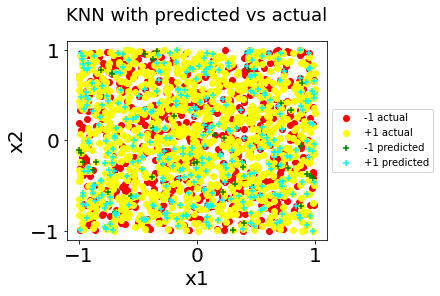

In [32]:
plt.rc('font', size=20)
plt.rcParams['figure.constrained_layout.use'] = True
plt.title("KNN with predicted vs actual",fontsize=18,pad=20)
plt.scatter(x1_neg, x2_neg, color='red')
plt.scatter(x1_pos, x2_pos, color='yellow')
plt.scatter(x1_pred_neg1, x2_pred_neg1, color='green',marker='+')
plt.scatter(x1_pred_pos1, x2_pred_pos1, color='cyan',marker='+')

plt.xlabel('x1'); plt.ylabel('x2')
plt.legend(['-1 actual','+1 actual','-1 predicted','+1 predicted'],loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 10  })
plt.savefig('KNN.png', facecolor='w', transparent=False)                                                                                                                
plt.show()

In [33]:
dummy = DummyClassifier(strategy='most_frequent').fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)
print(confusion_matrix(ytest, ydummy))
print(classification_report(ytest, ydummy))

[[  0 121]
 [  0 249]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       121
           1       0.67      1.00      0.80       249

    accuracy                           0.67       370
   macro avg       0.34      0.50      0.40       370
weighted avg       0.45      0.67      0.54       370



C:\Users\tomzt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ROC curve

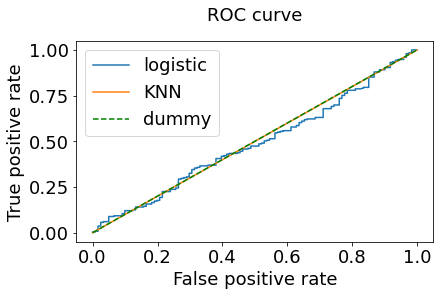

In [34]:

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True

fpr, tpr, _ = roc_curve(ytest,lr.decision_function(poly_X_test))
plt.plot(fpr,tpr)
fpr1, tpr1, _ = roc_curve(ytest,y_pred1)
plt.plot(fpr1,tpr1)
fpr2, tpr2, _ = roc_curve(ytest,ydummy)
plt.title("ROC curve",fontsize=18,pad=20)
plt.plot(fpr2,tpr2,color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(["logistic", "KNN", "dummy"]) 
plt.savefig('ROC.png', facecolor='w', transparent=False)
plt.show()